In [1]:
import sys
sys.path.append("..")

import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.data import read_graph
from src.data import dataset_analysis

%load_ext autoreload
%autoreload 2

seed = 12345

# Graph Analysis

In [2]:
g = read_graph.read_twitch(features_path="../data/raw/large_twitch_features.csv",
                    edges_path="../data/raw/large_twitch_edges.csv")

### Graph Statistics

#### Size

In [3]:
print("Number of nodes", g.order())
print("Number of edges", g.size())

Number of nodes 168114
Number of edges 6797557


#### Degree Distribution

Average Degree: 80.86842261798542
Maximum Degree: 35279
Minimum Degree: 1


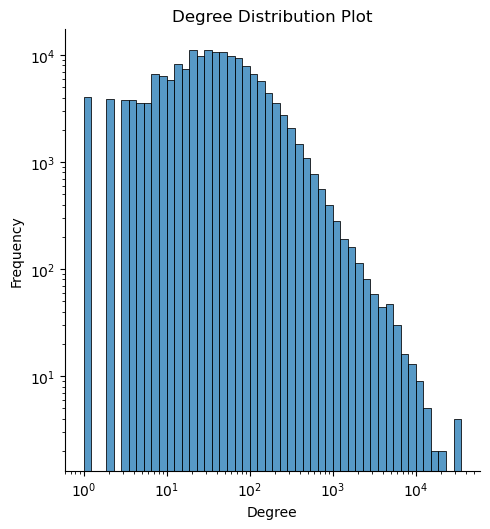

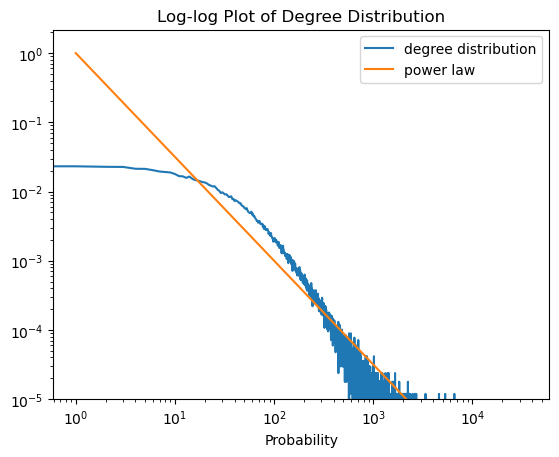

In [4]:
dataset_analysis.degree_statistics(g, log=True, name="twitch")

Since the maximum and minimum degree is obviously different, I use `log-scale` for the `degree`, x-axis, for the first plot. As we can see, the distribution of the degrees seem like a `power-law` distribution like other typical real networks. To verify that, I also plotted the log-log plot. As a result, we can see the the degree distribution follows the power-law.

### Community Analysis

To know whether there are communities, we need to find out the `community density`. If the community structure exist in the graph, we will see the `higher` density within communities than the density connect communities. More specifically, the density is defined by the density of edges. If edges connected two nodes within a same community, this edge is an `in-community edge`. Otherwise, the edge is an `out-community edge`. Therefore, the `in-community density` is defined by $density = \frac{number\_in\_communuty\_edges}{total\_edges}$

In [5]:
dataset_analysis.community_analysis(g, "language")

Average In-Community Density: 0.8999937771761237
Average Out-Community Density: 0.10000622282387628
Average Density Gap: 0.7999875543522474


,in_community_edges,out_community_edges,in_community_density,out_community_density,density_gap
EN,10969744,650103,0.944052,0.055948,0.888105
ZH,135716,33574,0.801678,0.198322,0.603355
ES,171786,84021,0.671545,0.328455,0.343091
SV,11222,40338,0.217649,0.782351,-0.564701
DE,321506,124693,0.720544,0.279456,0.441088
RU,92964,40368,0.697237,0.302763,0.394474
CS,17328,10112,0.631487,0.368513,0.262974
DA,10150,15257,0.399496,0.600504,-0.201008
KO,29550,15476,0.656287,0.343713,0.312575
OTHER,404,41809,0.009571,0.990429,-0.980859


For `language`, even though there is some languages communities have less in-community density than out-community density, `negative density gap`, these density commonly have really small size. Therefore, the average density illustrates a large density gap, $0.799$. In other words, although `EN` community shows a obvious community strucuture, other communities are insignificant to detect. In conclusion, this dataset have really weak community strucutre to detect.

In [6]:
dataset_analysis.community_analysis(g, "mature")

Average In-Community Density: 0.5452725148167202
Average Out-Community Density: 0.4547274851832798
Average Density Gap: 0.09054502963344041


,in_community_edges,out_community_edges,in_community_density,out_community_density,density_gap
0,3528896,3091036,0.533071,0.466929,0.066143
1,3884146,3091036,0.556852,0.443148,0.113705


Unlike `language`, the `mature` does not show an at least positive community structure in terms of network topology. Specifically, the average density gap is positive but small. In other words, even we choose mature as the labels, communities, the community structure is also not obvious for community detection.

# Node Feature Analysis

Analyze the distribution of the node features, and try to figure our whether there is abnormalities or unexpected distribution.

In [7]:
feat_data = pd.read_csv("../data/raw/large_twitch_features.csv").drop(columns=["created_at", "updated_at"]).set_index("numeric_id")
feat_data["mature"] = feat_data["mature"] == 1
feat_data["dead_account"] = feat_data["dead_account"] == 1
feat_data["affiliate"] = feat_data["affiliate"] == 1
feat_data.head()

,views,mature,life_time,dead_account,language,affiliate
numeric_id,,,,,,
0,7879,True,969,False,EN,True
1,500,False,2699,False,EN,False
2,382502,True,3149,False,EN,True
3,386,False,1344,False,EN,False
4,2486,False,1784,False,EN,False


### Views

`Views` describes the number of views of the gamer, and it is quantitative with natural number, positive integers.

Views are differentiated significantlt, so the `log-scale` is used to plot the distribution for better visulization.

Views' distribution is like a `power-law distribution`. In other words, there are more gamers with higher number of views.

In [8]:
feat_data["views"].describe()

count    1.681140e+05
mean     1.881618e+05
std      3.326119e+06
min      0.000000e+00
25%      1.415000e+03
50%      4.117000e+03
75%      1.420800e+04
max      3.843966e+08
Name: views, dtype: float64

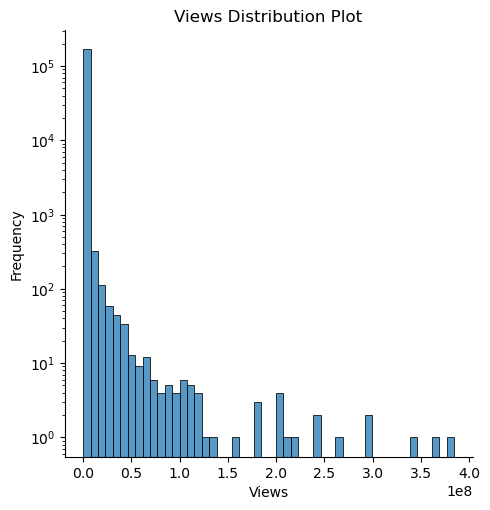

In [9]:
sns.displot(feat_data["views"], bins=50, log_scale=(False, True))
plt.title("Views Distribution Plot")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()
plt.close()

### Mature



`Mature` describes whether a gamer is an adult or not. Mature is discrete categorical data which only include two boolean values, `True` and `False`. Thus, this is a label which can differentiate the communities of adult gamers and non-adult gamers.

Mature is  relatively balanced distributed in this dataset, although `the number of not mature gamers is greater than the number of mature gamers`.

In [10]:
feat_data["mature"].describe()

count     168114
unique         2
top        False
freq       89081
Name: mature, dtype: object

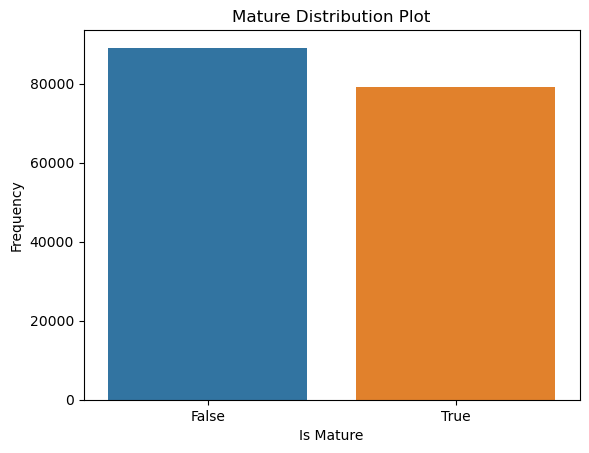

In [11]:
sns.countplot(x=feat_data["mature"])
plt.title("Mature Distribution Plot")
plt.xlabel("Is Mature")
plt.ylabel("Frequency")
plt.show()
plt.close()

### Life Time

`Life time` describes the life time of the account of the gamer, and the value is continuous quantitative.

The life time is `normally distributed`, but slightly `right skewed`. In other words, the longer life-time gamers are less.

In [12]:
feat_data["life_time"].describe()

count    168114.000000
mean       1541.812116
std         715.704133
min          11.000000
25%         997.000000
50%        1540.000000
75%        2027.000000
max        4161.000000
Name: life_time, dtype: float64

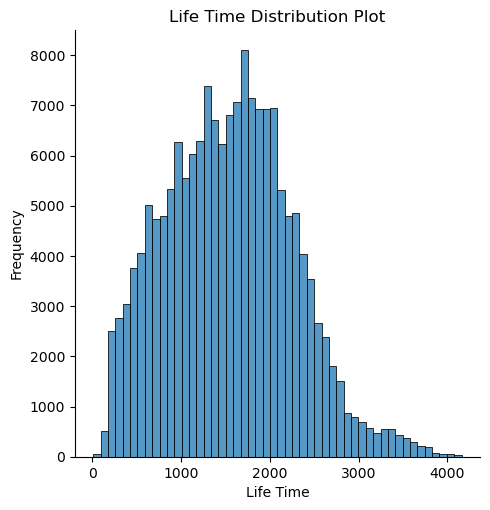

In [13]:
sns.displot(feat_data["life_time"], bins=50)
plt.title("Life Time Distribution Plot")
plt.xlabel("Life Time")
plt.ylabel("Frequency")
plt.show()
plt.close()

### Dead Account

`Dead account` is discrete categorical data which only include two boolean values, `True` and `False`. It describes whether a account is inactivative.

As we can see there is `only a small portion of accounts are considered as dead`.

In [14]:
feat_data["dead_account"].describe()

count     168114
unique         2
top        False
freq      162955
Name: dead_account, dtype: object

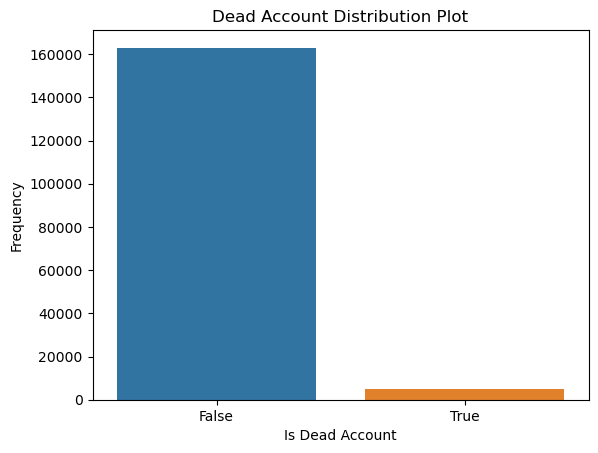

In [15]:
sns.countplot(x=feat_data["dead_account"])
plt.title("Dead Account Distribution Plot")
plt.xlabel("Is Dead Account")
plt.ylabel("Frequency")
plt.show()
plt.close()

### Language

`Language` is discrete categorical data which contains 21 various languages. Therefore, this is also a intuitive label for commmunities which describes the communities of different languages. 

`The largest propotion is English which is approximately 74% of the entire dataset.`

In [16]:
feat_data["language"].describe()

count     168114
unique        21
top           EN
freq      124411
Name: language, dtype: object

In [17]:
print("Propotion of English:", sum(feat_data["language"] == "EN") / feat_data.shape[0])

Propotion of English: 0.7400394970079827


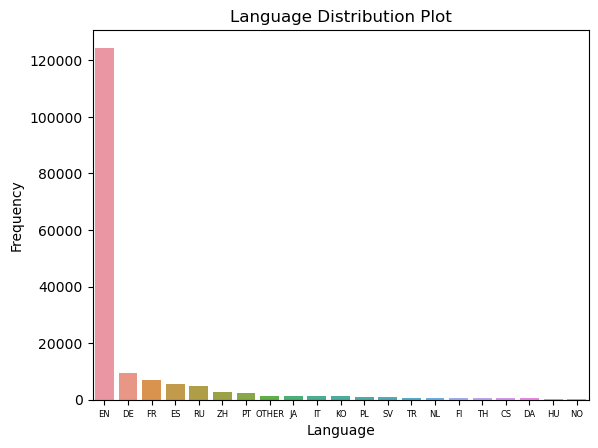

In [18]:
sns.countplot(x=feat_data["language"], order=feat_data["language"].value_counts().index)
plt.title("Language Distribution Plot")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.tick_params(axis='x', labelsize=6)
plt.show()
plt.close()

### Affiliate

`Affiliate` describes that whether the gamer is affliated to others. Affiliate is discrete categorical data which only include two boolean values, True and False. 

There are `more non-affiliate gamers than affliated gamers`, but the different is not obvious.

In [19]:
feat_data["affiliate"].describe()

count     168114
unique         2
top        False
freq       86568
Name: affiliate, dtype: object

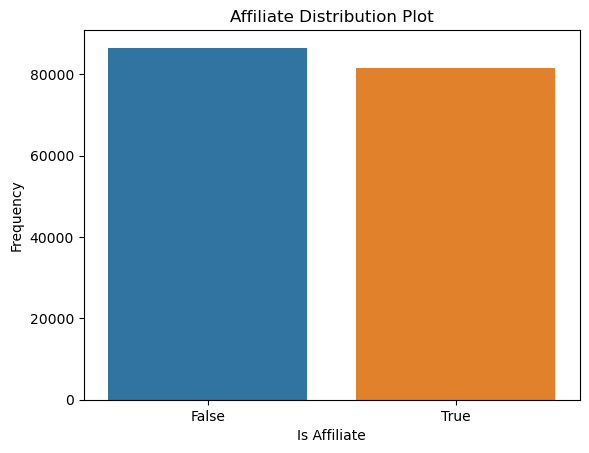

In [20]:
sns.countplot(x=feat_data["affiliate"])
plt.title("Affiliate Distribution Plot")
plt.xlabel("Is Affiliate")
plt.ylabel("Frequency")
plt.show()
plt.close()

Although all node features's distribution makes sense and seems no abnormalities, these features are are directly related to labels, language or mature. In other words, it might be difficult to make the model fit with these features due to weak correlations between features and communities.